<a href="https://colab.research.google.com/github/rajesh0305/MachineLearning_Module2/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement T-SNE using scikit learn
T-SNE(t-distribution stochastic neighborhood embedding )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MNIST digit recognizer/train.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label = df['label']

In [6]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
label.shape

(42000,)

In [8]:
data = df.drop(columns = 'label',axis = 1)

In [9]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


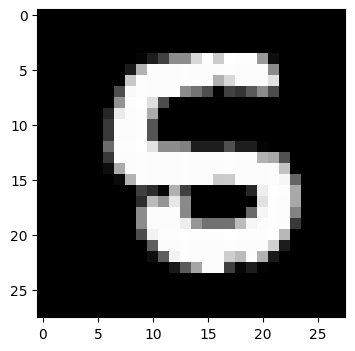

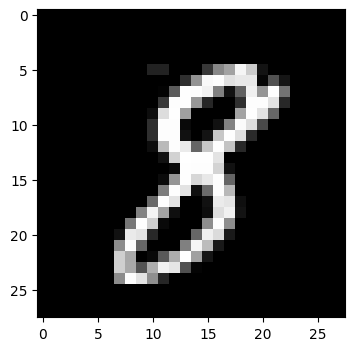

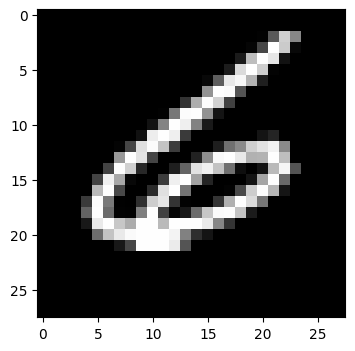

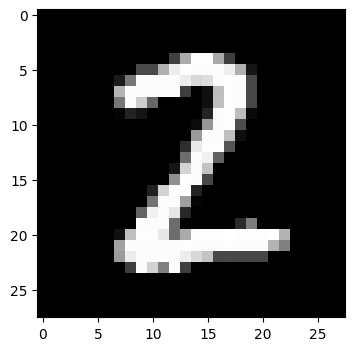

In [14]:
for idx in range(19,23,1):
  plt.figure(figsize = (4,4));
  grid_data = data.iloc[idx].to_numpy().reshape(28,28);
  plt.imshow(grid_data,interpolation = "none",cmap = 'gray')
  plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print("the shape of the column standardized data",standard_data.shape)

the shape of the column standardized data (42000, 784)


In [16]:
from sklearn.manifold import TSNE
model=TSNE(n_components = 2,random_state=0)

tsne_data = model.fit_transform(standard_data);

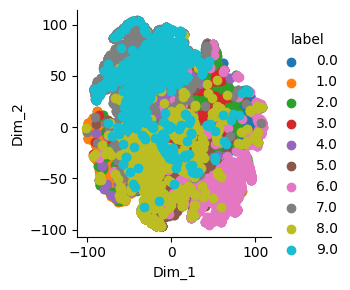

In [18]:
tsne_data = np.vstack((tsne_data.T,label)).T
tsne_dataframe = pd.DataFrame(data =tsne_data,columns = ("Dim_1","Dim_2","label"))

import seaborn as sns
sns.FacetGrid(tsne_dataframe,hue = "label")\
   .map(plt.scatter,"Dim_1","Dim_2")\
   .add_legend();
plt.show()


**Analysis:**here we are using default

1.  number of iteration =1000
2.  perplexity = 30


>overall:default hyperparameter more suitable for the datavisualization because .litte bit cluster of 8.0 and 9.0 or 6.0 as well rest of the datapoint are overlapped to each other.  







In [19]:
from sklearn.manifold import TSNE
model =TSNE(n_components =2,random_state=0,n_iter=1500,perplexity=50)


tsne_data = model.fit_transform(standard_data);


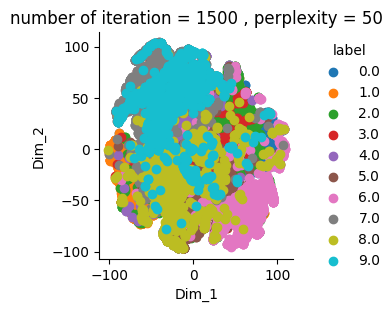

In [21]:
tsne_data = np.vstack((tsne_data.T,label)).T

tsne_dataframe = pd.DataFrame(data = tsne_dataframe,columns = ("Dim_1","Dim_2","label"))

import seaborn as sns
sns.FacetGrid(tsne_dataframe,hue ="label")\
   .map(plt.scatter,"Dim_1","Dim_2")\
   .add_legend();
plt.title("number of iteration = 1500 , perplexity = 50");
plt.show()

# **Analysis:**Now we are taking hyperparameter as


1.   number of iteration = 1500
2.   perplexity = 50


```
conclusion:here we can visualize easily the datapoint of {9.0,8.0,6.0}
and little bit of 4.0 and 1.0 as well
```





In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state = 0,n_iter =1500,perplexity = 100)

tsne_data =model.fit_transform(standard_data)

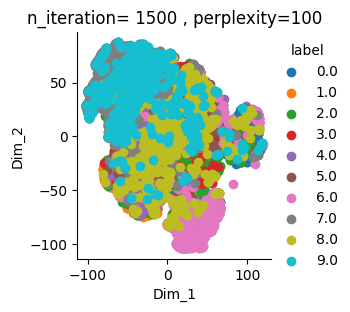

In [23]:
tsne_dataframe =np.vstack((tsne_data.T,label)).T
tsne_dataframe= pd.DataFrame(data = tsne_dataframe ,columns = ("Dim_1","Dim_2","label"))

import seaborn as sns
sns.FacetGrid(tsne_dataframe,hue = "label")\
   .map(plt.scatter,"Dim_1","Dim_2")\
   .add_legend();
plt.title("n_iteration= 1500 , perplexity=100")
plt.show()